In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

A picture of the simulation has been included in the folder (Sim1000.png)

First, we read in the data:

In [2]:
truthData = pd.read_csv( "particle_data/output_nt_Truth.csv", comment="#", \
names=[ "EventID", "Phi", "Theta", "Momentum" ] )
tracker1Data = pd.read_csv( "particle_data/output_nt_Tracker1.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )
tracker2Data = pd.read_csv( "particle_data/output_nt_Tracker2.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )

In [3]:
truthData

,EventID,Phi,Theta,Momentum
0,0,-0.063847,2.422340,45.2024
1,0,3.077680,0.719255,45.4999
2,1,0.702142,2.213210,45.4999
3,1,-2.439450,0.928381,45.4999
4,2,1.446030,0.929328,45.4999
...,...,...,...,...
1995,997,2.300160,1.147010,45.1561
1996,998,-2.633190,1.805450,42.1890
1997,998,0.429832,1.352430,44.6172
1998,999,-1.417030,1.447320,45.0538


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tracker1Data.head(70))
    
# Here you can see that after 5, there are no particles until event 12

,EventID,Phi,Theta
0,1,-2.447670,0.928358
1,1,0.710358,2.213220
2,2,-1.703770,2.212250
3,2,1.454290,0.929340
4,3,0.335390,2.182440
5,3,-2.790080,0.959136
6,4,0.710495,2.043770
7,4,-2.416360,1.098010
8,4,-2.416360,1.098010
9,4,-2.416230,1.098020


In [5]:
tracker2Data

,EventID,Phi,Theta
0,0,-2.066390,2.334350
1,1,-2.455900,0.928325
2,1,0.718557,2.213250
3,1,0.718558,2.213250
4,1,0.718534,2.213250
...,...,...,...
3233,997,-0.875075,2.025630
3234,998,0.443603,1.352440
3235,998,-2.647820,1.805460
3236,999,1.627990,1.771620


To take the number of true particles, we count the number of true particles in truthdata. To find the layer one hits we count the length of the EventID list (as we have many hits associated with singular events) and same for layer two hits.

In [6]:
# Finding number of unique particles in truthdata
truthData['EventID'].size

2000

Layer one hits per event

In [7]:
# Find number of layer one hits in each event
hits1 = tracker1Data.groupby(['EventID']).size().reset_index(name='count')

#hits = tracker1Data['EventID'].value_counts()

# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits1)

# Displaying eventID and number of hits

,EventID,count
0,1,2
1,2,2
2,3,2
3,4,34
4,5,2
5,6,20
6,13,13
7,14,2
8,17,2
9,18,2


Layer two hits per event

In [8]:
# Find number of layer two hits in each event
hits2 = tracker2Data.groupby(['EventID']).size().reset_index(name='count')



# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits2)

# Displaying eventID and number of hits

,EventID,count
0,0,1
1,1,7
2,2,2
3,3,6
4,4,2
5,5,2
6,6,8
7,13,15
8,14,2
9,17,2


EventIDs that are excluded from this list are due to them having no true particles within them, and therefore having a count of zero.

Next, find all pairs of hits between layer 1 and layer 2.

Also, calculate the momentum of the singular particles formed by these pairs (which is the next mark) and collect them into a list.

Once we've done that, we compare the pair to their true particle momenta values, and collect the distribution of $\frac{p_{reconstructed} - p_{true}}{p_{true}}$

In [40]:
# For each event in layer 1, scan over the particles and compare to the same event in layer 2. If theta different is sufficienctly small, find the pair and collect it.
#print(len(hits1['EventID']))
#print(hits1['count'][3])
#print(hits1['EventID'][3])
#hits1

# create list for number of pairs per event
event_no_list = []
mom_list = []
distribution_list = []

dist = 0

# Relevant variables
B = 0.5 # Tesla
# Radii of the two trackers
R1 = 4 # Metres
R2 = 8 # Metres

# Loop over all events in layer 1
for i in range(len(hits1['EventID'])):
    # reset pair number
    pair_no = 0
    # Loop over all counts in each event
    for j in range(hits1['count'][i]):
        # Compare to each event in same event in layer 2 
        # Check to make sure layer 2 has the event
        if ((hits2['EventID'] == hits1['EventID'][i]).any()):
            for k in range(hits2['count'][i]):
                # check angle to find pairs
                if (math.fabs(tracker1Data['Theta'][j] - tracker2Data['Theta'][k]) < 0.0001):
                    # Collect number of pairs for each event.
                    pair_no += 1
                    # Calculate momenta for each pair and append to a list.
                    deltaPhi = math.fabs(tracker1Data['Phi'][j]-tracker2Data['Phi'][k])
                    sagitta = math.sin(deltaPhi) * R1
                    # Simplified R as total path is given as L=8, and denominator is 8*sagitta.
                    R = (8)/(sagitta)
                    # Calculte and append momentum to list
                    mom = (0.3 * B * R)/np.sin(tracker1Data['Theta'][j])
                    mom_list.append(mom)
                    
                    # Compare this momenta to true value of momenta for this event, and append to list
                    # i*2 is a hacky way to get the correct momenta, as they come in pairs.
                    
                    # Need to check which true value to use, so compare thetas of true against layer 1
                    print(i, j, k)
                    print(truthData['Theta'][i*2], tracker1Data['Theta'][j])
                    print(math.fabs(truthData['Theta'][i*2] - tracker1Data['Theta'][j]))
                    if (math.fabs(truthData['Theta'][i*2] - tracker1Data['Theta'][j]) < 0.0001):
                        dist = (mom - truthData['Momentum'][i*2])/truthData['Momentum'][i*2]
                        distribution_list.append(dist)
                    elif (math.fabs(tracker1Data['Theta'][(i*2)+1] - tracker1Data['Theta'][j]) < 0.0001):
                        dist = (mom - truthData['Momentum'][(i*2)+1])/truthData['Momentum'][(i*2)+1]
                        distribution_list.append(dist)
                    else:
                        continue

                    
                    
        else:
            continue
    #print("Number of pairs in event {:.2f}: {:.2f}".format(hits1['EventID'][i], pair_no))
    event_no_list.append(pair_no)


1 0 1
2.21321 0.928358
1.284852
1 1 2
2.21321 2.21322
1.0000000000065512e-05
1 1 3
2.21321 2.21322
1.0000000000065512e-05
1 1 4
2.21321 2.21322
1.0000000000065512e-05
1 1 5
2.21321 2.21322
1.0000000000065512e-05
1 1 6
2.21321 2.21322
1.0000000000065512e-05
2 0 1
0.929328 0.928358
0.0009700000000000264
3 0 1
0.959131 0.928358
0.03077299999999994
3 1 2
0.959131 2.21322
1.2540890000000002
3 1 3
0.959131 2.21322
1.2540890000000002
3 1 4
0.959131 2.21322
1.2540890000000002
3 1 5
0.959131 2.21322
1.2540890000000002
4 0 1
1.09804 0.928358
0.1696819999999999
5 0 1
1.14703 0.928358
0.21867199999999998
6 0 1
1.51317 0.928358
0.5848119999999999
6 1 2
1.51317 2.21322
0.7000500000000003
6 1 3
1.51317 2.21322
0.7000500000000003
6 1 4
1.51317 2.21322
0.7000500000000003
6 1 5
1.51317 2.21322
0.7000500000000003
6 1 6
1.51317 2.21322
0.7000500000000003
6 1 7
1.51317 2.21322
0.7000500000000003
7 0 1
2.98604 0.928358
2.057682
7 1 2
2.98604 2.21322
0.7728199999999998
7 1 3
2.98604 2.21322
0.772819999999999

76 1 4
0.200326 2.21322
2.012894
76 1 5
0.200326 2.21322
2.012894
76 1 6
0.200326 2.21322
2.012894
76 1 7
0.200326 2.21322
2.012894
76 2 8
0.200326 2.21225
2.011924
76 3 9
0.200326 0.92934
0.729014
76 4 10
0.200326 2.18244
1.9821140000000002
77 0 1
2.88629 0.928358
1.9579319999999998
78 0 1
0.797895 0.928358
0.130463
79 0 1
0.601175 0.928358
0.327183
80 0 1
1.1521 0.928358
0.22374199999999989
80 1 2
1.1521 2.21322
1.0611200000000003
80 1 3
1.1521 2.21322
1.0611200000000003
80 1 4
1.1521 2.21322
1.0611200000000003
80 1 5
1.1521 2.21322
1.0611200000000003
80 1 6
1.1521 2.21322
1.0611200000000003
80 1 7
1.1521 2.21322
1.0611200000000003
81 0 1
1.59117 0.928358
0.662812
82 0 1
0.824341 0.928358
0.10401700000000003
83 0 1
1.688 0.928358
0.7596419999999999
84 0 1
2.37131 0.928358
1.4429519999999998
85 0 1
1.48309 0.928358
0.554732
85 1 2
1.48309 2.21322
0.7301300000000002
85 1 3
1.48309 2.21322
0.7301300000000002
85 1 4
1.48309 2.21322
0.7301300000000002
85 1 5
1.48309 2.21322
0.730130000000

185 0 1
0.961429 0.928358
0.03307099999999996
186 0 1
1.15421 0.928358
0.22585199999999994
187 0 1
0.513664 0.928358
0.414694
188 0 1
1.78911 0.928358
0.860752
189 0 1
2.44498 0.928358
1.5166220000000001
190 0 1
1.54068 0.928358
0.612322
191 0 1
2.55728 0.928358
1.628922
193 0 1
1.21371 0.928358
0.28535200000000005
194 0 1
2.57571 0.928358
1.647352
195 0 1
1.28076 0.928358
0.3524019999999999
196 0 1
2.36665 0.928358
1.438292
197 0 1
0.566441 0.928358
0.36191700000000004
198 0 1
2.43649 0.928358
1.508132
199 0 1
2.50776 0.928358
1.5794020000000002
200 0 1
2.40158 0.928358
1.473222
201 0 1
0.330277 0.928358
0.5980810000000001
202 0 1
2.39754 0.928358
1.4691819999999998
202 1 2
2.39754 2.21322
0.1843199999999996
202 1 3
2.39754 2.21322
0.1843199999999996
202 1 4
2.39754 2.21322
0.1843199999999996
202 1 5
2.39754 2.21322
0.1843199999999996
202 1 6
2.39754 2.21322
0.1843199999999996
202 1 7
2.39754 2.21322
0.1843199999999996
204 0 1
1.95916 0.928358
1.030802
205 0 1
2.03597 0.928358
1.10761

348 3 9
1.27601 0.92934
0.34667000000000003
348 4 10
1.27601 2.18244
0.9064300000000001
348 5 11
1.27601 0.959136
0.3168740000000001
348 5 12
1.27601 0.959136
0.3168740000000001
348 5 13
1.27601 0.959136
0.3168740000000001
348 5 14
1.27601 0.959136
0.3168740000000001
348 5 15
1.27601 0.959136
0.3168740000000001
348 6 16
1.27601 2.04377
0.7677599999999998
348 7 17
1.27601 1.09801
0.17800000000000016
348 8 17
1.27601 1.09801
0.17800000000000016
348 9 17
1.27601 1.09802
0.1779900000000001
349 0 1
2.75162 0.928358
1.823262
350 0 1
2.02297 0.928358
1.094612
351 0 1
1.53111 0.928358
0.602752
352 0 1
0.760702 0.928358
0.16765600000000003
353 0 1
2.33758 0.928358
1.409222
354 0 1
0.616317 0.928358
0.312041
355 0 1
1.22297 0.928358
0.2946119999999999
356 0 1
0.403989 0.928358
0.5243690000000001
357 0 1
1.10011 0.928358
0.1717519999999999
358 0 1
0.524004 0.928358
0.404354
359 0 1
0.610573 0.928358
0.317785
360 0 1
0.379865 0.928358
0.548493
361 0 1
0.832038 0.928358
0.09631999999999996
362 0 1


473 1 2
2.48135 2.21322
0.26812999999999976
473 1 3
2.48135 2.21322
0.26812999999999976
473 1 4
2.48135 2.21322
0.26812999999999976
473 1 5
2.48135 2.21322
0.26812999999999976
474 0 1
0.345139 0.928358
0.583219
475 0 1
0.664195 0.928358
0.26416300000000004
476 0 1
0.167749 0.928358
0.760609
477 0 1
2.4654 0.928358
1.5370419999999998
478 0 1
2.28703 0.928358
1.358672
479 0 1
1.63007 0.928358
0.7017119999999999
480 0 1
1.49119 0.928358
0.562832
481 0 1
1.75526 0.928358
0.826902
482 0 1
1.62687 0.928358
0.698512
483 0 1
2.39649 0.928358
1.468132
483 1 2
2.39649 2.21322
0.18326999999999982
483 1 3
2.39649 2.21322
0.18326999999999982
483 1 4
2.39649 2.21322
0.18326999999999982
483 1 5
2.39649 2.21322
0.18326999999999982
483 1 6
2.39649 2.21322
0.18326999999999982
484 0 1
0.271038 0.928358
0.65732
485 0 1
1.56305 0.928358
0.634692
485 1 2
1.56305 2.21322
0.6501700000000001
485 1 3
1.56305 2.21322
0.6501700000000001
485 1 4
1.56305 2.21322
0.6501700000000001
485 1 5
1.56305 2.21322
0.65017000

In [36]:
print(truthData['Theta'][2])
print(truthData['Theta'][3])

2.21321
0.928381


In [31]:
# Print pairs per event separately
print(event_no_list)
print(np.sum(event_no_list))
print(distribution_list)

[0, 6, 1, 5, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 15, 1, 6, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 17, 7, 1, 7, 1, 1, 1, 10, 1, 6, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 10, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 0, 1, 1, 1, 1, 5, 1, 2, 1, 7, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 3, 1, 1, 7, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1, 2, 1, 7, 1, 7, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 1, 2, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 10, 1, 1, 7, 6, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 14, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 19, 1, 2, 1, 1

In [25]:
# Print momentum list
print(mom_list[:10])

[45.52925541920648, 45.700894182409385, 45.695321027524365, 45.82945301872997, 45.924940622494724, 45.936200625358076, 45.52925541920648, 45.52925541920648, 45.700894182409385, 45.695321027524365]


Plot a histogram of the distribution of predicted against true momenta

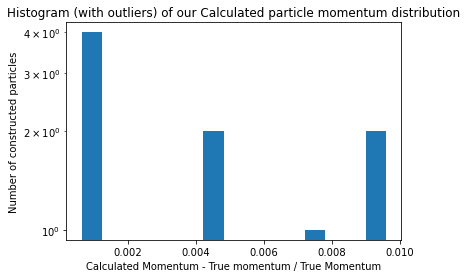

In [33]:
plt.hist(distribution_list, bins = 15, log = True)
plt.xlabel("Calculated Momentum - True momentum / True Momentum")
plt.ylabel("Number of constructed particles")
plt.title("Histogram (with outliers) of our Calculated particle momentum distribution")
plt.show()

Very accurate results! Although there appears to be a general offset of 0.01. Reran the code and restarted the kernel to check, but these results seem to be the real deal. I've also scanned through the logic of my code, and done a couple checks to make sure I'm not doing something horrendously wrong, but I can't find anything of such! I'd therefore argue that the momentum resolution 